In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('DB').getOrCreate()

In [2]:
spark

In [4]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
os.environ["JAVA_HOME"] ="C:\Program Files\Java\jdk-17"

In [3]:
taxi= spark.read\
      .option("header", "true")\
      .option("inferSchema", "true")\
      .parquet("C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-01.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-02.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-03.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-04.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-05.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-06.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-07.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-08.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-09.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-10.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-11.parquet",\
                "C:/Users/ginny/OneDrive/桌面/Data Base/2023DB_Final_Project/yellow_tripdata_2022/yellow_tripdata_2022-12.parquet")

In [4]:
taxi.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



In [5]:
taxi.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2022-02-01 08:06:58|  2022-02-01 08:19:24|            1.0|          5.4|       1.0|                 N|         138|         252|           1|       17.0| 1.75|    0.5|       3.

In [13]:
pickup_hour=taxi.select(hour(col("tpep_pickup_datetime")).alias("hour"),\
                        month(col("tpep_pickup_datetime")).alias("month"))

In [21]:
hm=pickup_hour.groupBy("hour","month").count()

In [22]:
hour=hm.toPandas()
hour_m=hour.pivot(index='month', columns='hour', values='count')
print(hour_m)

hour       0       1       2       3       4       5       6       7       8   \
month                                                                           
1      167538  174575  175306  151504  120046  111912  105696   81328   60091   
2      189257  209448  222533  195785  156698  148060  142095  113391   77916   
3      228761  249957  264555  236659  200263  189579  172825  136289   93826   
4      225420  246691  257261  219039  203753  191872  176411  140290   97264   
5      221394  238792  253553  231154  197335  191948  177398  146709  101906   
6      215049  233095  251161  231885  196907  193477  176295  143994  102816   
7      194944  216663  228445  208101  173466  171063  157399  131140   94695   
8      194119  210083  224005  198576  172582  164806  152415  123479   88388   
9      187793  205441  216531  202600  181184  172689  158746  131025   92771   
10     223622  249128  256499  241344  214080  204540  186693  152291  107232   
11     200765  213992  22246

In [15]:
peak_hour=pickup_hour.groupBy("hour").count().sort(col("count").desc())
peak_hour.show(24,truncate=False)

+----+-------+
|hour|count  |
+----+-------+
|2   |2798619|
|1   |2668468|
|3   |2533782|
|23  |2478428|
|0   |2459296|
|22  |2416452|
|21  |2260701|
|20  |2213324|
|4   |2188858|
|5   |2103776|
|19  |2049998|
|6   |1938130|
|18  |1887523|
|17  |1708384|
|7   |1570240|
|16  |1517785|
|15  |1140581|
|8   |1103016|
|9   |726059 |
|14  |616087 |
|10  |484034 |
|11  |319801 |
|13  |252388 |
|12  |220368 |
+----+-------+



peak hour : 2
off-peak hour : 12


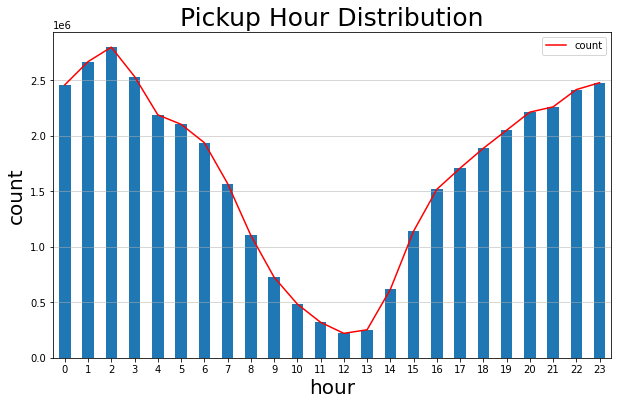

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
peak_hour_pd=peak_hour.sort("hour").toPandas()

print("peak hour :",peak_hour_pd.idxmax()[1])
print("off-peak hour :",peak_hour_pd.idxmin()[1])
ax=peak_hour_pd.plot.bar(x="hour",y="count",rot=0,legend=False,figsize=(10,6))
peak_hour_pd.plot.line("hour",ax=ax,color="red",label=".")
plt.title("Pickup Hour Distribution",fontsize=25)
plt.xlabel("hour",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.grid(axis='y', linewidth = 0.5)
plt.show()

In [15]:
peak_month=pickup_hour.groupBy("month").count().sort(col("count").desc())
peak_month.show()

+-----+-------+
|month|  count|
+-----+-------+
|   10|3689460|
|    3|3611523|
|    4|3601623|
|    5|3597229|
|    6|3555990|
|   12|3414327|
|   11|3244894|
|    7|3190826|
|    9|3172912|
|    8|3139900|
|    2|2972326|
|    1|2465088|
+-----+-------+



In [21]:
print(type(taxi))

<class 'pyspark.sql.dataframe.DataFrame'>


<class 'pandas.core.frame.DataFrame'>
peak month : 9
off-peak month : 0


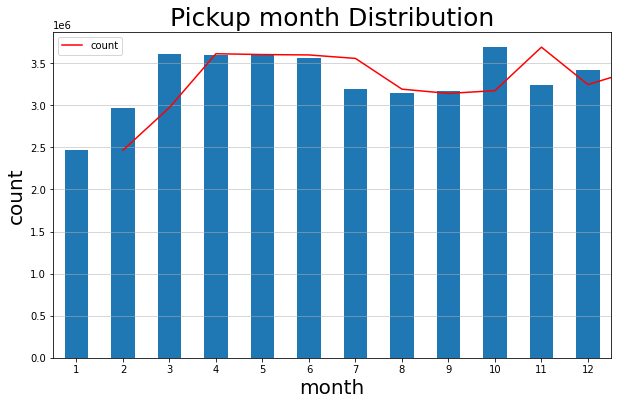

In [20]:
peak_month_pd=peak_month.sort("month").toPandas()

print("peak month :",peak_month_pd.idxmax()[1])
print("off-peak month :",peak_month_pd.idxmin()[1])
ax=peak_month_pd.plot.bar(x="month",y="count",rot=0,legend=False,figsize=(10,6))
peak_month_pd.plot.line("month",ax=ax,color="red",label=".")
plt.title("Pickup month Distribution",fontsize=25)
plt.xlabel("month",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.grid(axis='y', linewidth = 0.5)
plt.show()